In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import pickle

def draw(mymodel,modelRefData, scalar, pcaAnalyzer, newRecord):
    clf = pickle.loads(mymodel)
    pca = pickle.loads(modelRefData)
    scalar = pickle.loads(scalar)
    pcaAnalyzer = pickle.loads(pcaAnalyzer)

    newRefinedRecord = scalar.transform(newRecord)
    newRefinedRecord = pcaAnalyzer.transform(newRefinedRecord)
    
    xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    # plot the line, the points, and the nearest vectors to the plane
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    y_pred_train = clf.predict(pca)
    y_pred_test = clf.predict(newRefinedRecord)
    
    outlier = scalar.transform([[5,4,5,4,4,2]])
    outlier  = pcaAnalyzer.transform(outlier)
    
    y_pred_outliers = clf.predict(outlier)
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

    plt.title("Payments Data in n-Dimensonal Space")
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

    s = 40
    b1 = plt.scatter(pca[:, 0], pca[:, 1], c='white', s=s, edgecolors='k')
    b2 = plt.scatter(newRefinedRecord[:, 0], newRefinedRecord[:, 1], c='gold', s=150,
                     edgecolors='k')
  #  c = plt.scatter(outlier[:, 0], outlier[:, 1], c='gold', s=200,
   #                 edgecolors='k')

    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 9))
    plt.legend([a.collections[0], b1, b2],
               ["learned frontier", "training observations",
                "new observations"],
               loc="upper left",
               prop=matplotlib.font_manager.FontProperties(size=11))
    plt.show()

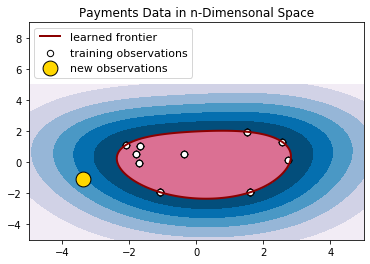

In [41]:
import ModelSaver as ms
jsonModel = ms.loadTrainedModelDetails('kk')
newRecord = ([[5,4,5,4,4,2]])
#newRecord = ([[1,1,2,2,1,2]])
draw(jsonModel['model'],jsonModel['modelRefData'],jsonModel['scalar'],jsonModel['pca'],newRecord)
